# Connect Google Drive

In [1]:
from google.colab import drive
drive.mount('/content/gdrive')
!ln -s /content/gdrive/My\ Drive/ /mydrive

Mounted at /content/gdrive


## Cloning and Building Darknet

In [2]:
# clone darknet repo
!git clone https://github.com/AlexeyAB/darknet

Cloning into 'darknet'...
remote: Enumerating objects: 21, done.
remote: Counting objects: 100% (21/21), done.
remote: Compressing objects: 100% (16/16), done.
remote: Total 14604 (delta 6), reused 11 (delta 4), pack-reused 14583
Receiving objects: 100% (14604/14604), 13.27 MiB | 22.99 MiB/s, done.
Resolving deltas: 100% (9932/9932), done.


In [3]:
# change makefile to have GPU and OPENCV enabled
%cd darknet
!sed -i 's/OPENCV=0/OPENCV=1/' Makefile
!sed -i 's/GPU=0/GPU=1/' Makefile
!sed -i 's/CUDNN=0/CUDNN=1/' Makefile

/content/darknet


In [4]:
# verify CUDA
!/usr/local/cuda/bin/nvcc --version

nvcc: NVIDIA (R) Cuda compiler driver
Copyright (c) 2005-2019 NVIDIA Corporation
Built on Sun_Jul_28_19:07:16_PDT_2019
Cuda compilation tools, release 10.1, V10.1.243


In [ ]:
# make darknet (build)
!make

In [7]:
# define helper functions
def imShow(path):
  import cv2
  import matplotlib.pyplot as plt
  %matplotlib inline

  image = cv2.imread(path)
  height, width = image.shape[:2]
  resized_image = cv2.resize(image,(3*width, 3*height), interpolation = cv2.INTER_CUBIC)

  fig = plt.gcf()
  fig.set_size_inches(18, 10)
  plt.axis("off")
  plt.imshow(cv2.cvtColor(resized_image, cv2.COLOR_BGR2RGB))
  plt.show()

# use this to upload files
def upload():
  from google.colab import files
  uploaded = files.upload() 
  for name, data in uploaded.items():
    with open(name, 'wb') as f:
      f.write(data)
      print ('saved file', name)

# use this to download a file  
def download(path):
  from google.colab import files
  files.download(path)

In [8]:
!cp /mydrive/crop_weed_detection/obj.zip ../

In [ ]:
!unzip ../obj.zip -d data/obj

Configuring Files for Training

*   Cfg File

In [10]:
# upload the custom .cfg to cloud VM from Google Drive
!cp /mydrive/crop_weed_detection/crop_weed.cfg ./cfg

* obj.names and obj.data

In [11]:
# upload the obj.names and obj.data files to cloud VM from Google Drive
!cp /mydrive/crop_weed_detection/obj.names ./data
!cp /mydrive/crop_weed_detection/obj.data  ./data

* Generating train.txt

In [12]:
# upload the generate_train.py script to cloud VM from Google Drive
!cp /mydrive/crop_weed_detection/generate_train.py ./

In [13]:
!python generate_train.py

In [14]:
# verify train.txt can be seen in our darknet/data folder
!ls data/

9k.tree     eagle.jpg	 imagenet.labels.list	   obj.data	     scream.jpg
coco9k.map  giraffe.jpg  imagenet.shortnames.list  obj.names	     train.txt
coco.names  goal.txt	 labels			   openimages.names  voc.names
dog.jpg     horses.jpg	 obj			   person.jpg


In [ ]:
# upload pretrained convolutional layer weights
!wget http://pjreddie.com/media/files/darknet53.conv.74

URL transformed to HTTPS due to an HSTS policy
--2020-12-10 19:15:32--  https://pjreddie.com/media/files/darknet53.conv.74
Resolving pjreddie.com (pjreddie.com)... 128.208.4.108
Connecting to pjreddie.com (pjreddie.com)|128.208.4.108|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 162482580 (155M) [application/octet-stream]
Saving to: ‘darknet53.conv.74.1’

darknet53.conv.74.1 100%[===================>] 154.96M  1.51MB/s    in 95s     

2020-12-10 19:17:07 (1.64 MB/s) - ‘darknet53.conv.74.1’ saved [162482580/162482580]



In [ ]:
# train your custom detector
!./darknet detector train data/obj.data cfg/crop_weed.cfg darknet53.conv.74 -dont_show 

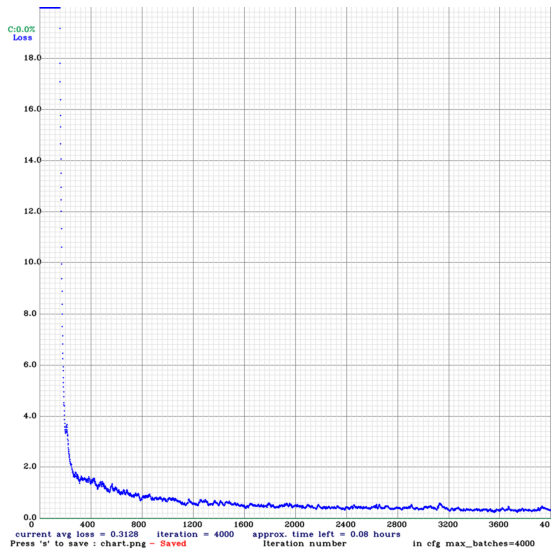

In [ ]:
imShow('chart.png')

In [15]:
# need to set our custom cfg to test mode 
%cd cfg
!sed -i 's/batch=32/batch=1/' crop_weed.cfg
!sed -i 's/subdivisions=16/subdivisions=1/' crop_weed.cfg
%cd ..

/content/darknet/cfg
/content/darknet


In [16]:
!ls /mydrive/crop_weed_detection/test/

crop_1.jpeg  crop_3.jpeg  weed_1.jpeg  weed_3.jpeg  weed_5.jpeg
crop_2.jpeg  crop_4.jpeg  weed_2.jpeg  weed_4.jpeg  weed_6.jpeg


 CUDA-version: 10010 (10010), cuDNN: 7.6.5, GPU count: 1  
 OpenCV version: 3.2.0
 0 : compute_capability = 750, cudnn_half = 0, GPU: Tesla T4 
net.optimized_memory = 0 
mini_batch = 1, batch = 1, time_steps = 1, train = 0 
   layer   filters  size/strd(dil)      input                output
   0 conv     32       3 x 3/ 1    512 x 512 x   3 ->  512 x 512 x  32 0.453 BF
   1 conv     64       3 x 3/ 2    512 x 512 x  32 ->  256 x 256 x  64 2.416 BF
   2 conv     32       1 x 1/ 1    256 x 256 x  64 ->  256 x 256 x  32 0.268 BF
   3 conv     64       3 x 3/ 1    256 x 256 x  32 ->  256 x 256 x  64 2.416 BF
   4 Shortcut Layer: 1,  wt = 0, wn = 0, outputs: 256 x 256 x  64 0.004 BF
   5 conv    128       3 x 3/ 2    256 x 256 x  64 ->  128 x 128 x 128 2.416 BF
   6 conv     64       1 x 1/ 1    128 x 128 x 128 ->  128 x 128 x  64 0.268 BF
   7 conv    128       3 x 3/ 1    128 x 128 x  64 ->  128 x 128 x 128 2.416 BF
   8 Shortcut Layer: 5,  wt = 0, wn = 0, outputs: 128 x 128 x 128 0.002 B

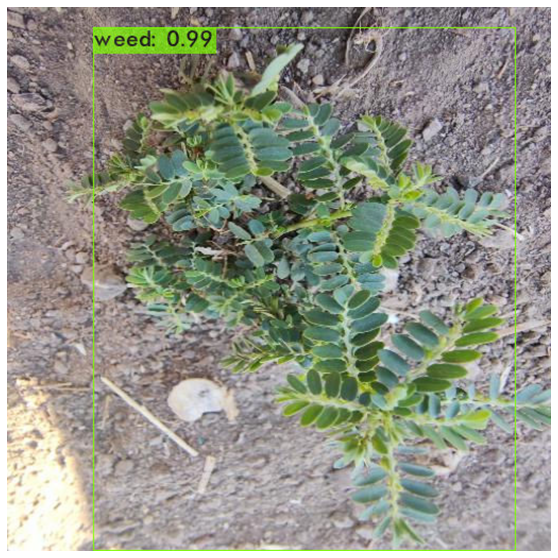

In [17]:
# run your custom detector with this command (upload an image to your google drive to test, thresh flag sets accuracy that detection must be in order to show it)
!./darknet detector test data/obj.data cfg/crop_weed.cfg /mydrive/crop_weed_detection/backup/crop_weed_final.weights /mydrive/crop_weed_detection/test/weed_1.jpeg  -thresh 0.3
imShow('predictions.jpg')

 CUDA-version: 10010 (10010), cuDNN: 7.6.5, GPU count: 1  
 OpenCV version: 3.2.0
 0 : compute_capability = 750, cudnn_half = 0, GPU: Tesla T4 
net.optimized_memory = 0 
mini_batch = 1, batch = 1, time_steps = 1, train = 0 
   layer   filters  size/strd(dil)      input                output
   0 conv     32       3 x 3/ 1    512 x 512 x   3 ->  512 x 512 x  32 0.453 BF
   1 conv     64       3 x 3/ 2    512 x 512 x  32 ->  256 x 256 x  64 2.416 BF
   2 conv     32       1 x 1/ 1    256 x 256 x  64 ->  256 x 256 x  32 0.268 BF
   3 conv     64       3 x 3/ 1    256 x 256 x  32 ->  256 x 256 x  64 2.416 BF
   4 Shortcut Layer: 1,  wt = 0, wn = 0, outputs: 256 x 256 x  64 0.004 BF
   5 conv    128       3 x 3/ 2    256 x 256 x  64 ->  128 x 128 x 128 2.416 BF
   6 conv     64       1 x 1/ 1    128 x 128 x 128 ->  128 x 128 x  64 0.268 BF
   7 conv    128       3 x 3/ 1    128 x 128 x  64 ->  128 x 128 x 128 2.416 BF
   8 Shortcut Layer: 5,  wt = 0, wn = 0, outputs: 128 x 128 x 128 0.002 B

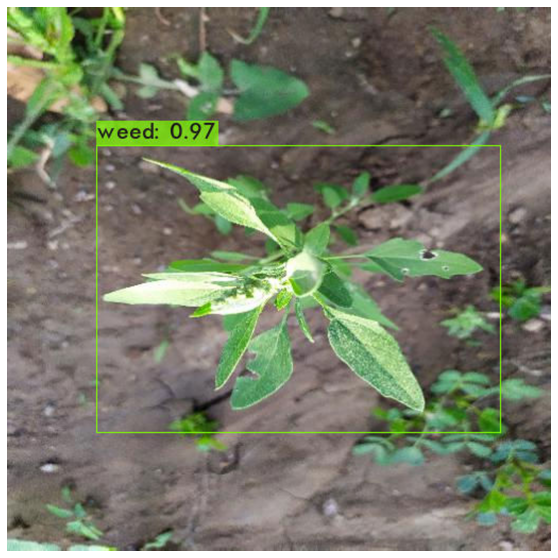

In [18]:
!./darknet detector test data/obj.data cfg/crop_weed.cfg /mydrive/crop_weed_detection/backup/crop_weed_final.weights /mydrive/crop_weed_detection/test/weed_2.jpeg  -thresh 0.3
imShow('predictions.jpg')

 CUDA-version: 10010 (10010), cuDNN: 7.6.5, GPU count: 1  
 OpenCV version: 3.2.0
 0 : compute_capability = 750, cudnn_half = 0, GPU: Tesla T4 
net.optimized_memory = 0 
mini_batch = 1, batch = 1, time_steps = 1, train = 0 
   layer   filters  size/strd(dil)      input                output
   0 conv     32       3 x 3/ 1    512 x 512 x   3 ->  512 x 512 x  32 0.453 BF
   1 conv     64       3 x 3/ 2    512 x 512 x  32 ->  256 x 256 x  64 2.416 BF
   2 conv     32       1 x 1/ 1    256 x 256 x  64 ->  256 x 256 x  32 0.268 BF
   3 conv     64       3 x 3/ 1    256 x 256 x  32 ->  256 x 256 x  64 2.416 BF
   4 Shortcut Layer: 1,  wt = 0, wn = 0, outputs: 256 x 256 x  64 0.004 BF
   5 conv    128       3 x 3/ 2    256 x 256 x  64 ->  128 x 128 x 128 2.416 BF
   6 conv     64       1 x 1/ 1    128 x 128 x 128 ->  128 x 128 x  64 0.268 BF
   7 conv    128       3 x 3/ 1    128 x 128 x  64 ->  128 x 128 x 128 2.416 BF
   8 Shortcut Layer: 5,  wt = 0, wn = 0, outputs: 128 x 128 x 128 0.002 B

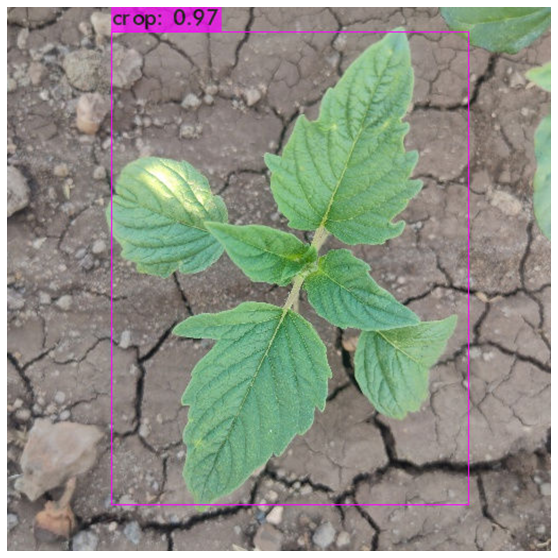

In [19]:
!./darknet detector test data/obj.data cfg/crop_weed.cfg /mydrive/crop_weed_detection/backup/crop_weed_final.weights /mydrive/crop_weed_detection/test/crop_1.jpeg  -thresh 0.3
imShow('predictions.jpg')